Data Shape: (80000, 10)
   Unnamed: 0  gender   age  hypertension  heart_disease smoking_history  \
0           0  Female  80.0             0              1           never   
1           1  Female  54.0             0              0         No Info   
2           2    Male  28.0             0              0           never   
3           3  Female  36.0             0              0         current   
4           4    Male  76.0             1              1         current   

     bmi  HbA1c_level  blood_glucose_level  diabetes  
0  25.19          6.6                  140         0  
1  27.32          6.6                   80         0  
2  27.32          5.7                  158         0  
3  23.45          5.0                  155         0  
4  20.14          4.8                  155         0  

Columns after cleaning: Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Male', 'gender_Other',
       'smoking_histor

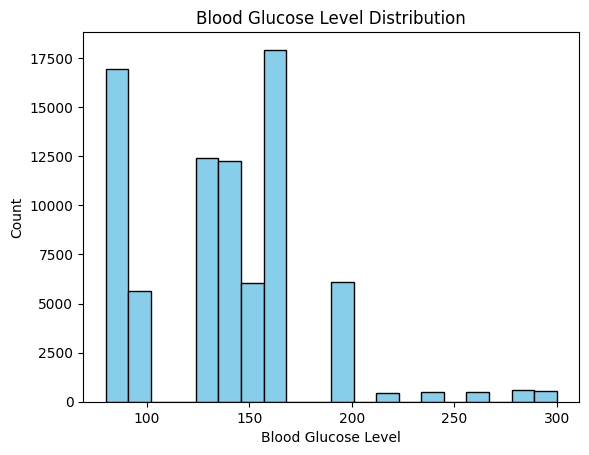

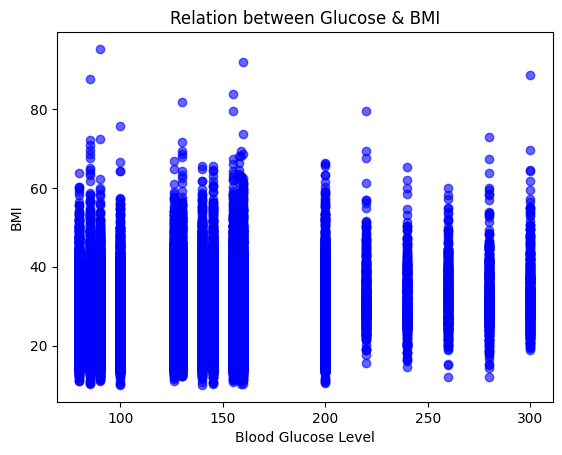

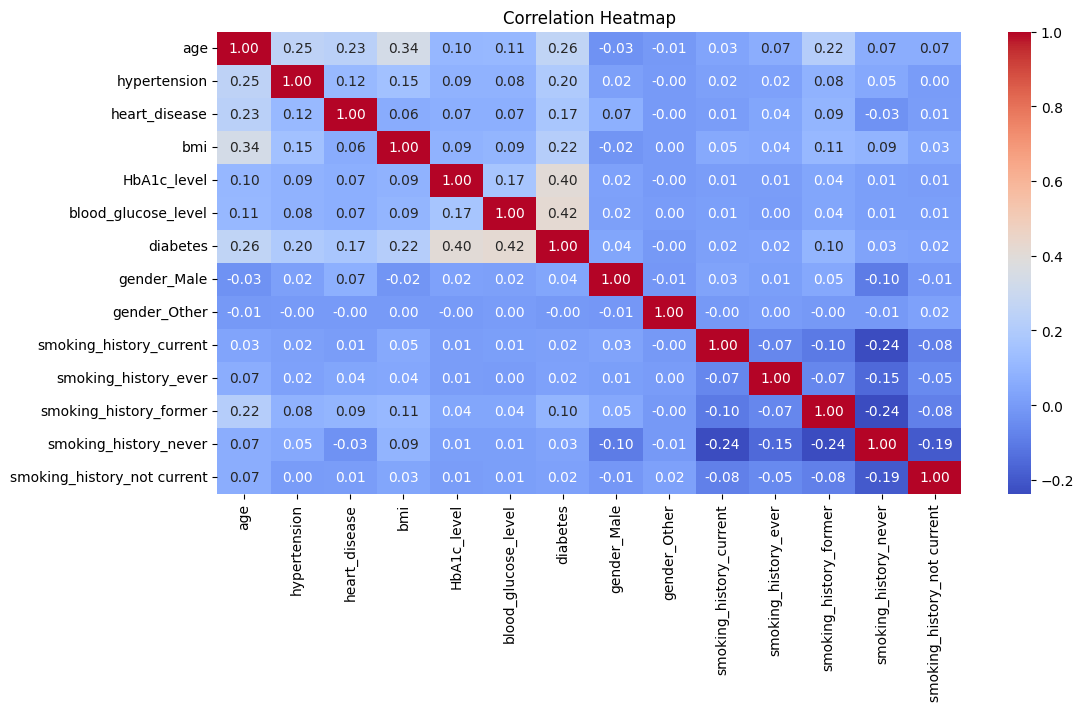

F1 Score: 0.7417721518987341

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     14635
           1       0.87      0.64      0.74      1365

    accuracy                           0.96     16000
   macro avg       0.92      0.82      0.86     16000
weighted avg       0.96      0.96      0.96     16000



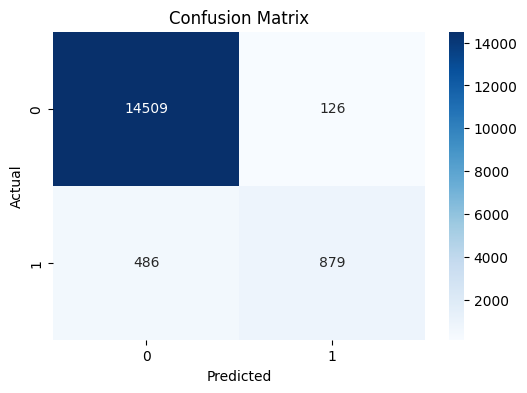

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# =============================
# 1) Load Data
# =============================
df = pd.read_csv("train_Data.csv")
df_test = pd.read_csv("test_Data.csv")   # مش هنستخدمه دلوقتي، بس موجود

print("Data Shape:", df.shape)
print(df.head())

# =============================
# 2) Basic Cleaning
# =============================
# شيل العمود اللي ملوش لازمة
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# معالجة الأعمدة النصية (تحويلها لأرقام)
df = pd.get_dummies(df, columns=["gender", "smoking_history"], drop_first=True)

# معالجة missing values (لو فيه)
df = df.dropna()

print("\nColumns after cleaning:", df.columns)

# =============================
# 3) EDA
# =============================

# توزيع blood_glucose_level
plt.hist(df["blood_glucose_level"], bins=20, color="skyblue", edgecolor="black")
plt.title("Blood Glucose Level Distribution")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Count")
plt.show()

# Scatter plot بين blood_glucose_level و bmi
plt.scatter(df["blood_glucose_level"], df["bmi"], color="blue", alpha=0.6)
plt.xlabel("Blood Glucose Level")
plt.ylabel("BMI")
plt.title("Relation between Glucose & BMI")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# =============================
# 4) Prepare Data
# =============================
X = df.drop("diabetes", axis=1)  # Features
y = df["diabetes"]               # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =============================
# 5) Logistic Regression
# =============================
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# =============================
# 6) Evaluation
# =============================
y_pred = model.predict(X_test)

print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
